<a href="https://colab.research.google.com/github/HazelNarendra/Proyek-PSD/blob/main/filter%20and%20windows/Praktikum%203/Jobsheet%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengimpor pustaka yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

# Mengatur ukuran font
FONT_SMALL = 12
FONT_MEDIUM = 14

# Mengatur ukuran font pada berbagai elemen plot
plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

# Mengaktifkan plotting di notebook secara langsung
%matplotlib inline

<ipython-input-11-e9552be68a41>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y1, use_line_collection=True, basefmt='C0')


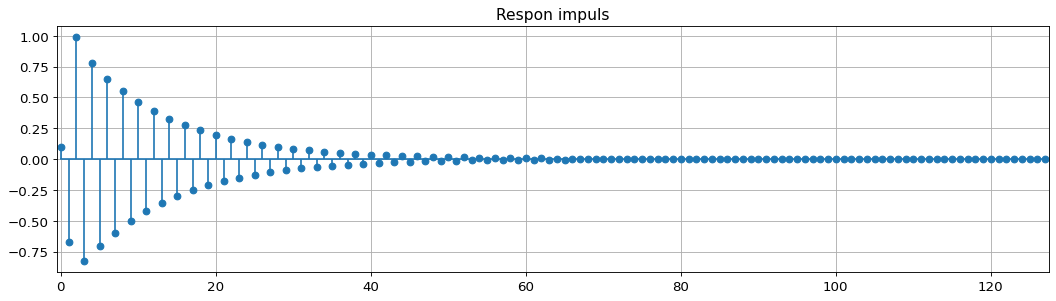

In [ ]:
# Panjang sinyal
N = 128

# Delta-function
x = np.zeros(N)
x[0] = 1

# Definisi koefisien filter
b = [0.1, -0.6, 0.5]  # Koefisien numerator
a = [1, 0.7, -0.2]    # Koefisien denominator

# Proses filtering sinyal input
y1 = lfilter(b, a, x)

# Plot impulse response
plt.figure(figsize=(16, 4), dpi=80)
plt.title('Respon impuls')
plt.stem(y1, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

Gambar diatas menunjukkan grafik yang mungkin merepresentasikan respons impuls dari sistem atau alat tertentu. Grafik ini memiliki sumbu horizontal yang menandakan waktu atau sampel dan sumbu vertikal yang menandakan amplitudo atau respons.

Dilihat dari grafik:
1. Terdapat satu titik dengan amplitudo tinggi (lebih dari 1.0) pada awal grafik, tepatnya di sekitar titik nol pada sumbu horizontal. Ini menandakan impuls yang diberikan.
2. Setelah impuls tersebut, grafik menunjukkan variasi yang cepat dan secara bertahap menurun dalam amplitudo serta mulai stabil mendekati nol.
3. Setelah sekitar 20 unit waktu/sampel, amplitudo secara umum berfluktuasi ringan di sekitar nilai nol, menunjukkan bahwa sistem telah kembali stabil setelah menerima impuls.

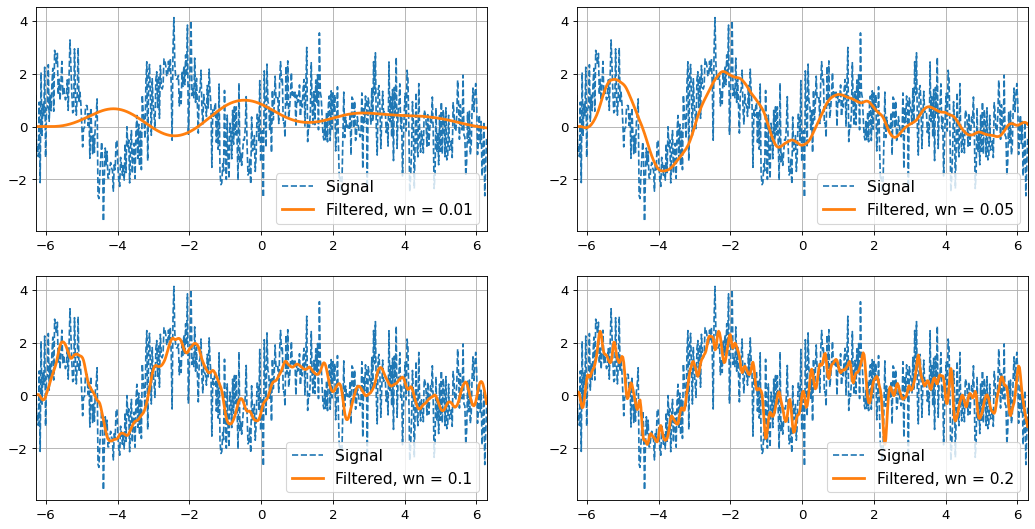

In [ ]:
# Membuat sinyal input
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Menambahkan noise putih
np.random.seed(1)
xn = x + np.random.randn(len(t))

# Filter lowpass Butterworth orde-3
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

# Daftar frekuensi cut-off yang akan diuji
wn = [0.01, 0.05, 0.1, 0.2]

# Menghitung filter IIR
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)

# Plot hasil
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Sinyal', 'Hasil Filter, wn = {}'.format(wn[i])), loc='lower right')

Gambar diatas menampilkan empat grafik yang berbeda, masing-masing menampilkan data sinyal yang terdiri dari komponen yang berisik (sinyal biru) dan hasil dari penerapan filter (sinyal oranye). Setiap grafik berlabel dengan nilai yang berbeda untuk parameter `wn`, yang kemungkinan merupakan nilai cutoff frekuensi normalisasi untuk filter yang digunakan.

1. **Grafik Kiri Atas (wn = 0.01)**: Pada grafik ini, sinyal yang difilter tampaknya tidak mengikuti sinyal asli dengan ketat, menunjukkan bahwa filter hampir tidak mengubah sinyal asli karena cutoff frekuensi sangat rendah.

2. **Grafik Kanan Atas (wn = 0.05)**: Filter di grafik ini sedikit lebih efektif dalam menghaluskan fluktuasi pada sinyal asli dibandingkan dengan grafik sebelumnya. Sinyal oranye (filtered) mulai lebih baik dalam menangkap tren umum dari sinyal biru (original), mengurangi kebisingan namun tetap mempertahankan informasi utama dari sinyal asli.

3. **Grafik Kiri Bawah (wn = 0.1)**: Dalam grafik ini, sinyal hasil filter tampak lebih halus dan mengikuti tren umum dari sinyal asli dengan lebih jelas lagi. Efek kebisingan lebih banyak dikurangi, dan ini menunjukkan bahwa peningkatan nilai 'wn' membantu dalam menangkap aspek penting dari sinyal sambil mengurangi noise.

4. **Grafik Kanan Bawah (wn = 0.2)**: Di sini, sinyal yang telah difilter sangat halus dan efisien dalam mengurangi noise, namun mungkin juga menghilangkan beberapa detail penting dari sinyal asli. Hal ini menggambarkan trade-off antara mengurangi noise dan mempertahankan detail sinyal asli.

In [ ]:
# Panjang sinyal delta
N = 40

# Membuat delta-function
x = np.zeros(N)
x[0] = 1

# Orde filter - M
M = 16

# Sinyal input
# h(z) = 1 + z^(-1) + ... + z^(-9)
b = np.ones(M-1)
a = [1]

# Filtering dengan filter FIR
y1 = lfilter(b, a, x)

# Mengubah ke bentuk rekursif
b = np.zeros(M)
b[0] = 1
b[M-1] = -1

a = [1, -1]

# Filtering dengan filter IIR rekursif
y2 = lfilter(b, a, x)

# Memeriksa perbedaan
np.all(y1 == y2)

True

<ipython-input-13-aab3cf75e35e>:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y2, use_line_collection=True, basefmt='C0')


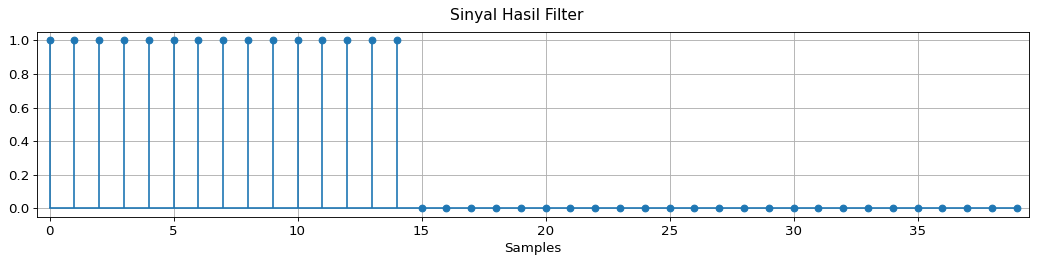

In [ ]:
# Mengatur ukuran plot
plt.figure(figsize=(16, 3), dpi=80)

# Plot sinyal hasil filtering dengan stem plot
plt.stem(y2, use_line_collection=True, basefmt='C0')

# Menyesuaikan batas sumbu x
plt.xlim([-0.5, N-0.5])

# Menambah label sumbu x
plt.xlabel('Samples')

# Menambah judul keseluruhan plot
plt.suptitle('Sinyal Hasil Filter')

# Menambah grid
plt.grid(True)

Gambar diatas adalah grafik yang menampilkan sinyal hasil filter. Grafik ini ditandai dengan sumbu horizontal yang berlabel "Samples" dan sumbu vertikal yang berlabel dari 0 hingga 1.0.

Dari grafik, kita bisa melihat bahwa sinyal ini berkarakteristik sebagai sinyal digital yang mengandung sinyal impuls (di mana nilai-nilainya loncat dari 0 menjadi 1 dan kemudian kembali ke 0) dan tampaknya merupakan hasil dari penerapan filter digital pada sinyal input. Impuls-impuls ini terjadi secara berkala dan terdapat sebanyak 10 impuls pada interval sampel yang ditampilkan.

Impuls tersebut memiliki amplitudo maksimal sebesar 1.0 dan kembali ke 0 setelah setiap impuls, menunjukkan bahwa sinyal ini bisa jadi merupakan hasil dari filter yang mengisolasi atau mendeteksi peristiwa khusus dalam sinyal asli, mungkin untuk tujuan analisis atau pemrosesan lebih lanjut dalam aplikasi teknis atau ilmiah tertentu.


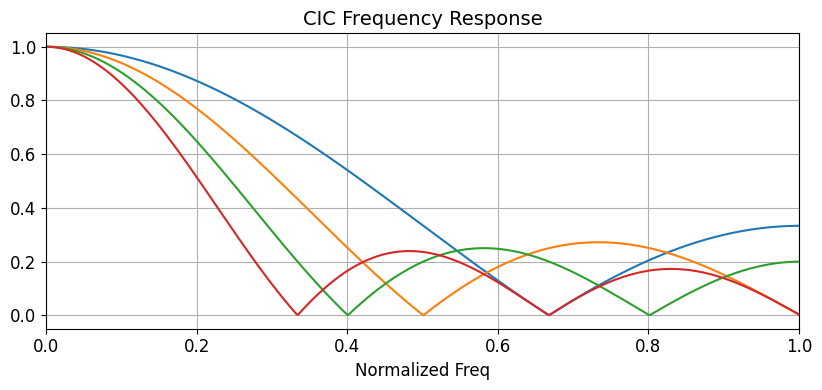

In [ ]:
# Jumlah titik FFT
N = 512

# Generate frequency vector
f = np.linspace(0, 1, N, endpoint=True)

# Koefisien filter CIC
b = [1, 1, 1]

# Membuat plot
plt.figure(figsize=(16, 4))

# Plot frekuensi respons CIC untuk beberapa tingkat filter
plt.subplot(1, 2, 1)
for i in range(4):
    # Menghitung respons frekuensi
    _, h = freqz(b, N)
    h = np.abs(h)

    # Normalisasi respons frekuensi dan plot
    plt.plot(f, h/np.max(h))

    # Menyesuaikan batas sumbu x
    plt.xlim([0, 1])

    # Menambah grid
    plt.grid(True)

    # Menambah koefisien baru untuk filter CIC
    b.append(1)

# Menambah label sumbu x
plt.xlabel('Normalized Freq')

# Menambah judul plot
plt.title('CIC Frequency Response')

# Menyesuaikan tata letak
plt.tight_layout()

Gambar diatas adalah sebuah grafik respon frekuensi untuk filter Cascaded Integrator-Comb (CIC). Grafik ini menunjukkan respons berbagai filter CIC dengan konfigurasi yang berbeda terhadap frekuensi yang dinormalisasi dari 0 hingga 1.

Dalam gambar ini, terdapat beberapa kurva dengan warna berbeda yang merepresentasikan filter CIC dengan orde atau faktor desimasi yang berbeda. Setiap kurva menunjukkan bagaimana amplitudo sinyal terpengaruh oleh frekuensi. Pada frekuensi rendah (mendekati 0), amplitudo relatif tinggi menunjukkan lebih banyak sinyal yang dilewatkan (passband). Sebagai frekuensi meningkat, amplitudo menurun, yang menandakan bahwa filter mulai menyaring (attenuate) frekuensi tersebut.

Di sekitar frekuensi tertinggi (mendekati 1), kurva menunjukkan perilaku yang berfluktuasi atau bergelombang ciri khas dari filter CIC, dikenal sebagai "ripple" dalam frekuensi stopband.

<ipython-input-15-ba379a43a8cb>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(taps, use_line_collection=True, basefmt='C0')


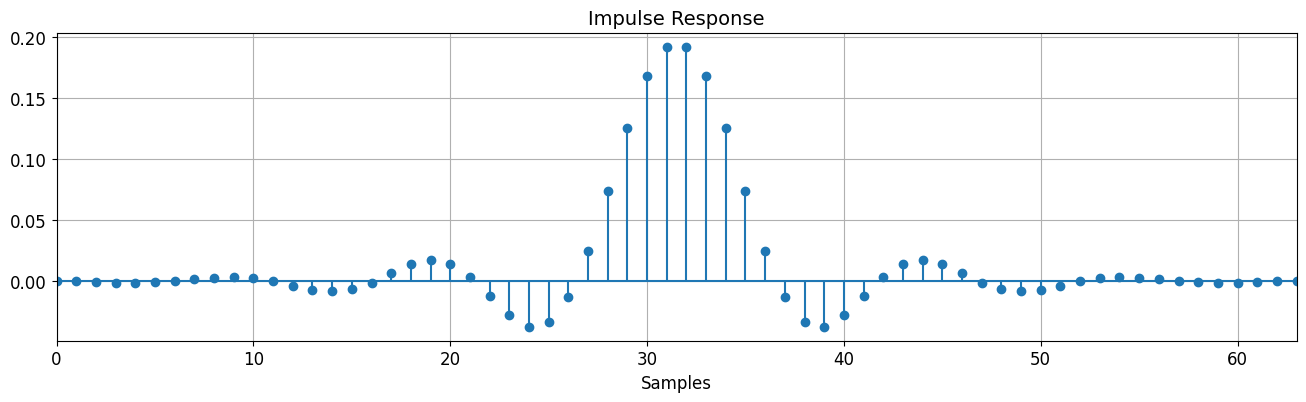

In [ ]:
# Jumlah titik FFT
N = 100

# Daftar frekuensi
lst_freqs = np.linspace(0, 1, N)

# Daftar gain
lst_gain = np.zeros(N)
lst_gain[0:20] = 1

# Taps filter FIR
NFIR = 64
taps = firwin2(NFIR, lst_freqs, lst_gain)

# Membuat plot
plt.figure(figsize=(16, 4), dpi=100)
plt.title('Impulse Response')

# Plot taps filter FIR dengan stem plot
plt.stem(taps, use_line_collection=True, basefmt='C0')

# Menyesuaikan batas sumbu x
plt.xlim([0, NFIR-1])

# Menambah label sumbu x
plt.xlabel('Samples')

# Menambah grid
plt.grid(True)

Gambar diatas adalah sebuah grafik yang menggambarkan respon impuls. Dalam grafik ini, sumbu horizontal menunjukkan "Samples" yang mungkin mengacu pada instance waktu atau titik data, dan sumbu vertikal menunjukkan nilainya (tampaknya tanpa unit yang ditentukan, bisa sebagai tegangan, daya, atau parameter lain tergantung konteks penggunaannya).

Pada grafik ini, terdapat sejumlah puncak pada sampel ke-29 sampai ke-35 yang memiliki nilai lebih tinggi dibandingkan dengan sampel lainnya. Ini menunjukkan adanya impuls atau sinyal yang signifikan pada rentang sampel tersebut. Respon impuls seperti yang ditampilkan biasanya penting dalam analisis sistem dinamis dan sistem kontrol untuk mengevaluasi bagaimana sistem bereaksi terhadap input yang tiba-tiba dan sekejap tanpa perubahan sebelum atau setelahnya.

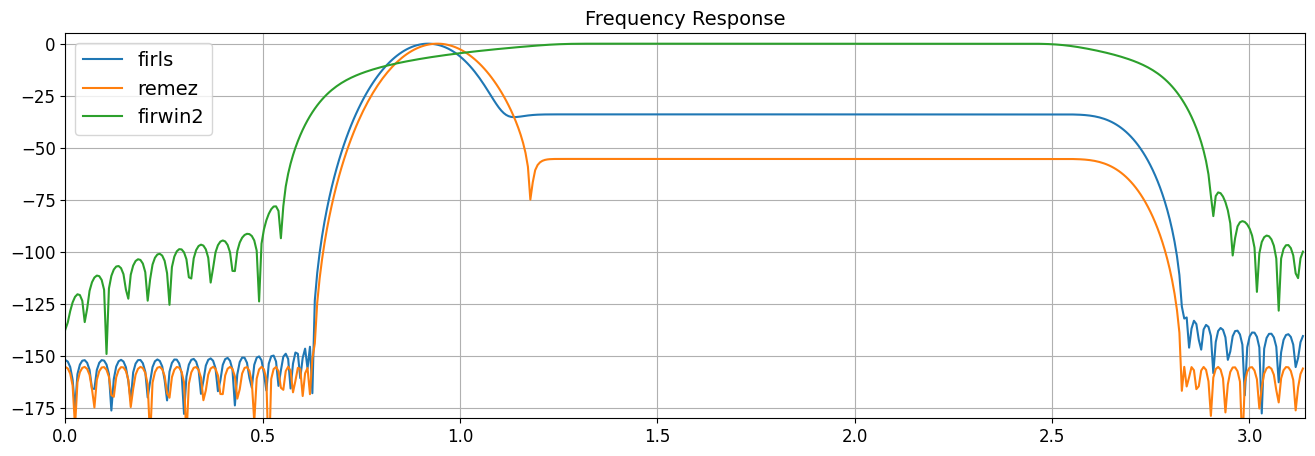

In [ ]:
# Parameter masukan
fs = 10  # Frekuensi sampling
N = 117  # Jumlah koefisien filter FIR yang diinginkan
desired = (0, 0, 1, 1, 0, 0)  # Respon filter yang diinginkan
bands = (0, 1, 2, 4, 4.5, 5)  # Batas frekuensi

# Filter FIR menggunakan metode firls, remez, dan firwin2
fir_firls = firls(N, bands, desired, fs=fs)
fir_remez = remez(N, bands, desired[::2], fs=fs)
fir_firwin2 = firwin2(N, bands, desired, fs=fs)

# Plot hasil dan hitung FFT
plt.figure(figsize=(16, 5))
plt.title('Frequency Response')

# Loop untuk setiap filter FIR
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))

# Menyesuaikan batas sumbu x dan y
plt.xlim([0, np.pi])
plt.ylim([-180, 5])

# Menambah legenda
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')

# Menambah grid
plt.grid(True)

Gambar diatas adalah grafik tanggapan frekuensi dari tiga jenis filter sinyal digital, yang direpresentasikan oleh tiga kurva dengan warna yang berbeda. Pada grafik ini, sumbu X mewakili frekuensi (dalam unit yang tidak disebutkan, namun biasanya dalam Hz atau radian per sample) dan sumbu Y mewakili kekuatan tanggapan dalam dB (desibel).

1. **Kurva Hijau ("fir1s")**: Kurva ini tampaknya menunjukkan tanggapan frekuensi untuk salah satu jenis Finite Impulse Response (FIR) filter, dimana pada frekuensi rendah tanggapannya sangat bervariasi (berfluktuasi), yang sering terjadi pada jenis-jenis filter klasik.

2. **Kurva Oranye ("remez")**: Tanggapan frekuensi untuk filter jenis Remez exchange. Kurva ini menunjukkan karakteristik "bandpass" yang sangat jelas, dengan penolakan (attenuation) yang kuat di frekuensi rendah dan tinggi serta penguatan yang stabil di frekuensi tengah. Remez exchange adalah metode populer untuk merancang filter dengan spesifikasi yang sangat tepat.

3. **Kurva Biru ("firiwin2")**: Mirip dengan kurva hijau, mungkin merupakan variasi lain dari filter FIR. Tanggapan frekuensi juga fluktuatif pada frekuensi rendah, tetapi kurang ekstrim dibandingkan dengan kurva hijau.

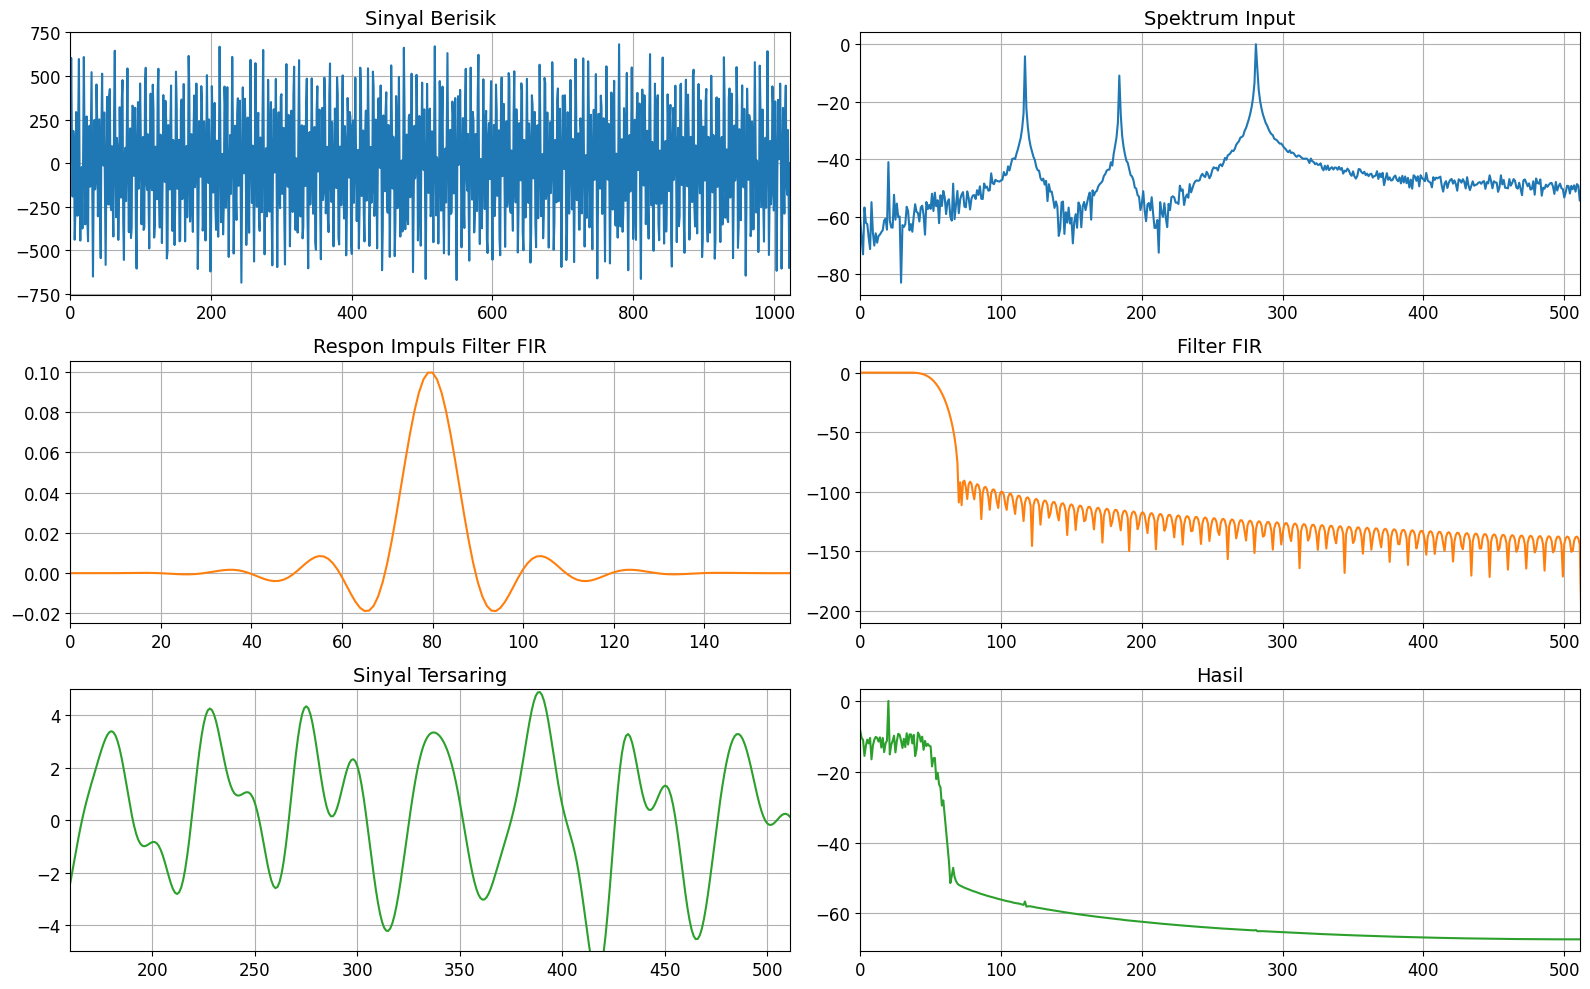

In [ ]:
# Jumlah sampel sinyal input
N = 1024

# Membuat sinyal input
t = np.linspace(0, 1, N, endpoint=True)
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Menambahkan noise putih
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Desain filter FIR Kaiser
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))

# Filtering sinyal input menggunakan filter FIR
y = lfilter(h, 1, xn)

# List sinyal input
lst_sig = [xn, h, y]

# Judul untuk setiap sinyal dan FFT
sig_titles = ['Sinyal Berisik', 'Respon Impuls Filter FIR', 'Sinyal Tersaring']
fft_titles = ['Spektrum Input', 'Filter FIR', 'Hasil']

# Membuat plot
plt.figure(figsize=(16, 10))
for i in range(3):
    # Menghitung FFT
    clc_fft = np.abs(fft(lst_sig[i], N))
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))

    # Plot sinyal
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)

    # Plot FFT
    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Pada gambar diatas, ada beberapa plot yang menggambarkan langkah-langkah proses pemrosesan sinyal melalui sebuah 'Filter'. Mari kita bahas masing-masing plot secara terpisah:

1. **Sinyal Berisik:**
   Plot pertama di bagian kiri atas menampilkan sinyal berisik. Sepertinya ini mungkin representasi dari sebuah sinyal audio atau gelombang lain yang telah terkontaminasi dengan noise (kebisingan). Sumbu X mungkin melambangkan waktu sedangkan sumbu Y mengindikasikan amplitude sinyal.

2. **Spektrum Input:**
   Di bagian kanan atas, ada plot yang menunjukkan spektrum dari sinyal input tersebut. Plot ini mengubah sinyal waktu ke domain frekuensi untuk menunjukkan komponen frekuensi yang ada dalam sinyal tersebut. Puncak-puncak dalam spektrum biasanya menunjukkan frekuensi dominan dalam sinyal.

3. **Respon Impuls Filter:**
   Plot pada bagian kiri bawah menunjukkan respon impuls dari filter yang digunakan. Respon impuls ini mencirikan bagaimana filter bereaksi terhadap sinyal input berupa delta (pulsa singular). Ini adalah karakteristik penting dari filter yang menunjukkan bagaimana ia mempengaruhi berbagai komponen frekuensi dari sinyal input.

4. **Filter IR:**
   Di samping plot respon impuls, ada plot yang tampaknya menggambarkan respon frekuensi dari filter tersebut. Plot ini menjelaskan bagaimana amplitudo dari berbagai frekuensi diubah oleh filter. Sepertinya filter ini didesain untuk menghilangkan atau melemahkan komponen frekuensi tertentu (mungkin noise) dari sinyal.

5. **Sinyal Tersaring:**
   Plot besar di bagian bawah kiri misalnya menunjukkan sinyal setelah diterapkan filter. Ini memperlihatkan pengurangan noise secara signifikan dan lebih mulus dibandingkan dengan sinyal asli berisik.

6. **Hasil:**
   Plot terakhir di bagian bawah kanan menunjukkan respons akhir, atau output dari sinyal setelah pemrosesan. Tampaknya ini adalah sinyal yang sudah dibersihkan dari komponen frekuensi yang tidak diinginkan.